In [454]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from database.TradeHistory import get_session, History
from database.db_utils import get_recent_hist15_df
import datetime
import pandas as pd

In [176]:
session = get_session()
past_time = datetime.datetime.utcnow() - datetime.timedelta(weeks=2)
df = get_recent_hist15_df(past_time, session)
df

,price,size,exec_date
0,1.798032e+06,323.329785,2018-01-04 01:30:00
1,1.809418e+06,576.220784,2018-01-04 01:45:00
2,1.809045e+06,281.442201,2018-01-04 02:00:00
3,1.812761e+06,214.982249,2018-01-04 02:15:00
4,1.818876e+06,159.905530,2018-01-04 02:30:00
5,1.815242e+06,217.875972,2018-01-04 02:45:00
6,1.823441e+06,255.286107,2018-01-04 03:00:00
7,1.837560e+06,264.291533,2018-01-04 03:15:00
8,1.840040e+06,265.048672,2018-01-04 03:30:00
9,1.834039e+06,305.323930,2018-01-04 03:45:00


In [177]:
session = get_session()
df = pd.read_sql_query('select * from history5min', session.bind)
df.exec_date = pd.to_datetime(df.exec_date)
df = df.set_index('exec_date')
df = df.loc['2018-01-13':]
df

,price,size
exec_date,,
2018-01-13 00:00:00,1.692541e+06,38.609738
2018-01-13 00:05:00,1.693258e+06,43.899119
2018-01-13 00:10:00,1.690725e+06,26.563938
2018-01-13 00:15:00,1.687365e+06,30.333915
2018-01-13 00:20:00,1.687555e+06,39.860388
2018-01-13 00:25:00,1.685893e+06,36.732233
2018-01-13 00:30:00,1.681482e+06,26.441517
2018-01-13 00:35:00,1.680252e+06,57.508744
2018-01-13 00:40:00,1.683271e+06,17.841396


In [178]:
df.size

2914

In [126]:
def zs(p, n, shift=0):
    return (p.shift(shift) - p.rolling(n).mean()) / p.rolling(n).std()


def avg(p, n):
    return p.rolling(n).mean()


def std(p, n):
    return p.rolling(n).std()

In [129]:
df.exec_date = pd.to_datetime(df.exec_date)
df = df.set_index('exec_date')

AttributeError: 'DataFrame' object has no attribute 'exec_date'

In [159]:
dfb[dfb.dv96_672.notnull()]

,price,size,pma12,pma96,pma672,ma4_36,ma12_96,ac12_12,ac96_96,vma12,...,pre_diff93,pre_diff94,pre_diff95,max_diff12,max_diff96,max_diff672,min_diff12,min_diff96,min_diff672,utctime
exec_date,,,,,,,,,,,,,,,,,,,,,
2018-01-15 23:45:00,1.673369e+06,47.355735,-2.066525,-1.631154,-2.280310,-1.576847,-0.616998,-1.292597,-1.750869,0.465505,...,-0.000257,0.000442,0.000876,-0.011477,-0.020878,-0.049336,0.000039,0.000039,0.014523,0.989583
2018-01-15 23:50:00,1.672970e+06,34.632562,-1.730736,-1.609246,-2.249453,-1.972549,-0.786104,-0.776772,-1.416300,-0.080503,...,0.000414,-0.000257,0.000442,-0.011713,-0.021112,-0.049562,0.000000,0.000000,0.014281,0.993056
2018-01-15 23:55:00,1.674706e+06,35.720986,-0.950824,-1.321995,-1.952992,-2.128387,-0.934581,0.147516,-0.636978,-0.086833,...,0.000985,0.000414,-0.000257,-0.010687,-0.020096,-0.048576,0.001038,0.001038,0.015334,0.996528
2018-01-16 00:00:00,1.676290e+06,49.231668,-0.229633,-1.058558,-1.691201,-1.834194,-1.081000,0.978616,0.080282,0.223549,...,-0.000990,0.000985,0.000414,-0.006876,-0.019169,-0.047676,0.001985,0.001985,0.016294,0.000000
2018-01-16 00:05:00,1.671691e+06,31.553440,-0.995630,-1.597020,-2.231100,-1.780467,-1.215951,0.278251,-0.667680,-0.339650,...,-0.001412,-0.000990,0.000985,-0.009241,-0.021860,-0.050289,0.000000,0.000000,0.013506,0.003472
2018-01-16 00:10:00,1.667855e+06,28.022749,-1.496203,-2.021398,-2.633670,-1.906632,-1.382985,-0.130153,-1.148308,-0.477723,...,-0.000466,-0.001412,-0.000990,-0.009752,-0.024104,-0.052468,0.000000,0.000000,0.011180,0.006944
2018-01-16 00:15:00,1.663342e+06,43.732556,-2.088831,-2.493477,-3.048708,-2.323031,-1.562903,-0.672607,-1.732644,-0.063019,...,0.002459,-0.000466,-0.001412,-0.010694,-0.026745,-0.055032,0.000000,0.000000,0.008444,0.010417
2018-01-16 00:20:00,1.664186e+06,15.374123,-1.585058,-2.260294,-2.792632,-2.726553,-1.650323,-0.200934,-1.225912,-0.847720,...,0.000504,0.002459,-0.000466,-0.010192,-0.026251,-0.054553,0.000507,0.000507,0.008956,0.013889
2018-01-16 00:25:00,1.659446e+06,58.022008,-2.249337,-2.708643,-3.159538,-3.042987,-1.787162,-0.924252,-1.901021,0.434350,...,0.001133,0.000504,0.002459,-0.013012,-0.029025,-0.057246,0.000000,0.000000,0.006082,0.017361


In [179]:
bench_price = df.price
bench_size = df['size']
dfb = pd.DataFrame([bench_price, bench_size]).T

p = dfb.price
v = dfb['size']

dfb['pma12'] = zs(p / avg(p, 12) - 1, 96)
dfb['pma96'] = zs(p / avg(p, 96) - 1, 96)
dfb['pma672'] = zs(p / avg(p, 672) - 1, 96)

dfb['ma4_36'] = zs(avg(p, 4) / avg(p, 36) - 1, 96)
dfb['ma12_96'] = zs(avg(p, 12) / avg(p, 96) - 1, 96)
dfb['ac12_12'] = zs((p / avg(p, 12)) / avg(p / avg(p, 12), 12), 96)
dfb['ac96_96'] = zs((p / avg(p, 96)) / avg(p / avg(p, 96), 12), 96)

dfb['vma12'] = zs(v / avg(v, 12) - 1, 96)
dfb['vma96'] = zs(v / avg(v, 96) - 1, 96)
dfb['vma672'] = zs(v / avg(v, 672) - 1, 96)

dfb['vZ12'] = zs(v, 12)
dfb['vZ96'] = zs(v, 96)
dfb['vZ672'] = zs(v, 672)

r_label_list = [
    'r', 'r_1', 'r_2',
]
for r_label in r_label_list:
    dfb[r_label] = 0
dfb['state'] = 0

dfb['pZ12'] = zs(p, 12)
dfb['pZ96'] = zs(p, 96)
dfb['vol12'] = zs(std(p, 12), 96)
dfb['vol96'] = zs(std(p, 96), 96)
dfb['vol672'] = zs(std(p, 672), 96)
dfb['dv12_96'] = zs(std(p, 12) / avg(std(p, 12), 96), 96)
dfb['dv96_672'] = zs(std(p, 96) / avg(std(p, 96), 672), 96)

for i in range(96):
    dfb['pZ96_s%02d' % i] = zs(p, 96, shift=i)
    
for i in range(96):
    dfb['pre_diff%02d' % i] = p.shift(i) / p.shift(i + 1) - 1

dfb['max_diff12'] = p / p.rolling(12).max() - 1
dfb['max_diff96'] = p / p.rolling(96).max() - 1
dfb['max_diff672'] = p / p.rolling(672).max() - 1

dfb['min_diff12'] = p / p.rolling(12).min() - 1
dfb['min_diff96'] = p / p.rolling(96).min() - 1
dfb['min_diff672'] = p / p.rolling(672).min() - 1

dfb['utctime'] = (dfb.index.hour * 4 + dfb.index.minute / 15) / 96

dfz = dfb

indicator = dfz.reset_index().loc[:, 'pma12':'utctime']
price_history = dfz.reset_index().price

indicator['vma12'] = indicator.vma12.fillna(0)
indicator['vZ12'] = indicator.vZ12.fillna(0)

In [180]:
answer = price_history.shift(-3) / price_history - 1
answer = (answer > 0.0005) * 1 - (answer < -0.0005) * 1 + 1

indexer = indicator.dv96_672.notnull()

In [181]:
import numpy as np
d_exp = indicator.loc[indexer]
d_obj = answer[indexer]
data = np.array(d_exp, dtype=np.float32)
t_data = np.array(d_obj, dtype=np.int32)

In [107]:
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList, cuda
import chainer.functions as F
import chainer.links as L

In [73]:
row, col = d_exp.shape

# ls_1 = 500
# ls_2 = 1000
# ls_3 = 1000
# ls_4 = 200
# out_size = 3
# class MyChain(Chain):
#     def __init__(self):
#         super().__init__(
#             l1=L.Linear(col, ls_1),
#             l2=L.Linear(ls_1, ls_2),
#             l3=L.Linear(ls_2, ls_3),
#             l4=L.Linear(ls_3, ls_4),
#             l5=L.Linear(ls_4, out_size)
#         )
    
#     def __call__(self, x):
#         h1 = F.sigmoid(self.l1(x))
#         h2 = F.sigmoid(self.l2(h1))
#         h3 = F.sigmoid(self.l3(h2))
#         h4 = F.sigmoid(self.l4(h3))
#         o = self.l5(h4)
#         return o

ls_1 = 600
ls_2 = 1200
ls_3 = 1200
ls_4 = 400
out_size = 3
class MyChain(Chain):
    def __init__(self):
        super().__init__(
            l1=L.Linear(col, ls_1),
            l2=L.Linear(ls_1, ls_2),
            l3=L.Linear(ls_2, ls_3),
            l4=L.Linear(ls_3, ls_4),
            l5=L.Linear(ls_4, out_size)
        )
    
    def __call__(self, x):
#         if chainer.config.train:
#             h = F.sigmoid(self.l1(x))
#             h = F.dropout(F.sigmoid(self.l2(h)), ratio=0.05)
# #             h = F.dropout(F.sigmoid(self.l3(h)), ratio=0.1)
#             h = F.dropout(F.leaky_relu(self.l4(h)), ratio=0.1)
#             h = F.sigmoid(self.l5(h))
#             print('train')
#         else:
        h = F.sigmoid(self.l1(x))
        h = F.sigmoid(self.l2(h))
        h = F.leaky_relu(self.l3(h))
        h = F.sigmoid(self.l4(h))
        o = self.l5(h)
        return o

In [75]:
model = MyChain()
serializers.load_npz('agent/6_12_12_4.npz', model)

In [182]:
res = model(data).data
res

array([[ 0.2607609 , -0.50627905,  0.20827554],
       [ 0.27279615, -0.48749197,  0.1664111 ],
       [ 0.28516984, -0.54996973,  0.19732815],
       ..., 
       [ 0.78829324, -1.39557433,  0.77281731],
       [ 0.79106057, -1.3871057 ,  0.76319808],
       [ 0.79895377, -1.36497366,  0.73015386]], dtype=float32)

In [183]:
result = d_obj.reset_index()
result['predict'] = res.argmax(axis=1)
result

,index,price,predict
0,861,2,0
1,862,0,0
2,863,0,0
3,864,0,0
4,865,0,0
5,866,0,0
6,867,0,0
7,868,0,2
8,869,0,0
9,870,2,0


In [184]:
test = result.loc[:]
test[test.price == test.predict].shape

(339, 3)

In [185]:
result.groupby(['price', 'predict']).size()

price  predict
0      0          246
       2           63
1      0           10
       2            7
2      0          177
       2           93
dtype: int64

In [186]:
price_test = price_history[indexer]

In [187]:
price_test

861     1.673369e+06
862     1.672970e+06
863     1.674706e+06
864     1.676290e+06
865     1.671691e+06
866     1.667855e+06
867     1.663342e+06
868     1.664186e+06
869     1.659446e+06
870     1.656052e+06
871     1.653787e+06
872     1.653653e+06
873     1.660081e+06
874     1.660294e+06
875     1.656771e+06
876     1.654849e+06
877     1.659731e+06
878     1.664989e+06
879     1.668586e+06
880     1.672040e+06
881     1.675026e+06
882     1.667042e+06
883     1.658135e+06
884     1.652699e+06
885     1.652538e+06
886     1.650843e+06
887     1.655707e+06
888     1.653226e+06
889     1.652979e+06
890     1.651959e+06
            ...     
1427    1.275481e+06
1428    1.275503e+06
1429    1.259329e+06
1430    1.242511e+06
1431    1.253659e+06
1432    1.266089e+06
1433    1.262712e+06
1434    1.261145e+06
1435    1.278115e+06
1436    1.288135e+06
1437    1.284812e+06
1438    1.279415e+06
1439    1.281449e+06
1440    1.275699e+06
1441    1.265753e+06
1442    1.266191e+06
1443    1.273

In [188]:
from matplotlib import pyplot as plt
%matplotlib inline

jpy = 40000
btc = 0
com = 0#0.15 / 100
x = []
y_p = []
y_jpy = []
sz_all = price_test.size
begin = 0
for i, (prc, pred) in enumerate(zip(price_test[begin:], result.predict[begin:])):
    if pred == 2 and jpy > 0:
        btc += jpy / (prc * (1 + com))
        jpy = 0
    elif pred == 0 and btc > 0:
        jpy += btc * (prc * (1 - com))
        btc = 0
    x.append(i)
    y_p.append(prc)
    y_jpy.append(jpy + btc * prc)
jpy + btc * prc

55836.787002389232

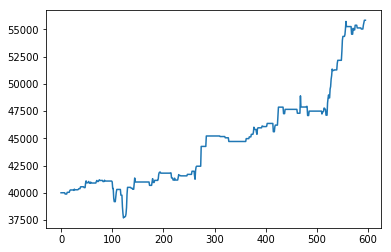

In [189]:
plt.plot(x, y_jpy)

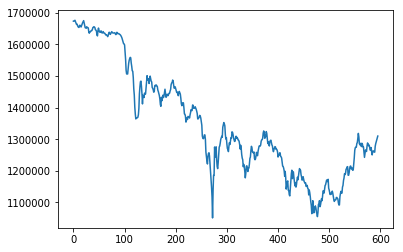

In [190]:
plt.plot(x, y_p)

In [67]:
exp_single = [indicator.loc[1000]]
data_single = np.array(exp_single, dtype=np.float32)
data_single

array([[-0.10468615, -0.24378949,  1.17827272,  0.31623939, -0.18529482,
        -0.30773506, -0.22841381, -0.77849382, -0.74054968, -0.65952748,
        -1.2418139 , -0.67521131, -0.88793594,  0.        ,  0.        ,
         0.        ,  0.        ,  0.68722892,  1.45043373, -0.45318955,
         0.09282427,  1.86361432, -0.63901508,  0.07308167,  0.70833331]], dtype=float32)

In [47]:
test.price.shift(0)

1060    2
1061    0
1062    1
1063    0
1064    0
1065    0
1066    0
1067    0
1068    0
1069    0
1070    0
1071    0
1072    0
1073    2
1074    2
1075    0
1076    0
1077    0
1078    1
1079    0
1080    2
1081    2
1082    2
1083    2
1084    2
1085    2
1086    0
1087    0
1088    2
1089    2
       ..
1126    0
1127    0
1128    0
1129    0
1130    0
1131    0
1132    1
1133    0
1134    0
1135    2
1136    2
1137    0
1138    0
1139    0
1140    0
1141    2
1142    2
1143    0
1144    0
1145    2
1146    2
1147    2
1148    2
1149    2
1150    0
1151    0
1152    0
1153    2
1154    0
1155    1
Name: price, Length: 96, dtype: int32